## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Performed Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

### Dropping irrelevant columns

In [6]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

### Counting categorical data

In [7]:
cols=df.columns.tolist()
print(cols)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


In [8]:
sum=0;
for i in cols:
    if(df[i].nunique()<20):
        sum+=1
        print(df[i].value_counts())
        print('----------------------------')
print(f"Total:",sum)

Survived
0    266
1    152
Name: count, dtype: int64
----------------------------
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
----------------------------
Sex
male      266
female    152
Name: count, dtype: int64
----------------------------
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
----------------------------
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64
----------------------------
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
----------------------------
Total: 6


### Handling Missing Values

In [9]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Embarked,0


In [10]:
from sklearn.impute import SimpleImputer
cols = [3]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.50000,0,0,Q
1,1,3,female,47.00000,1,0,S
2,0,2,male,62.00000,0,0,Q
3,0,3,male,27.00000,0,0,S
4,1,3,female,22.00000,1,1,S
...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,S
414,1,1,female,39.00000,0,0,C
415,0,3,male,38.50000,0,0,S
416,0,3,male,30.27259,0,0,S


## Visualization

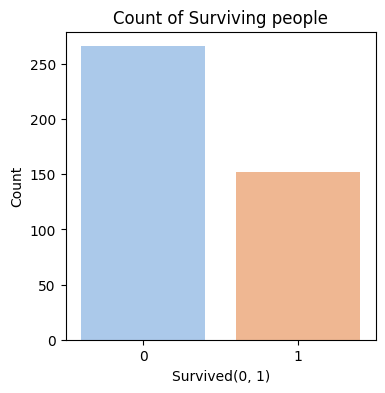

In [12]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="Survived", hue="Survived", palette="pastel", legend=False)
plt.title("Count of Surviving people")
plt.xlabel("Survived(0, 1)")
plt.ylabel("Count")
plt.show()

In [13]:
cols=df.columns.tolist()

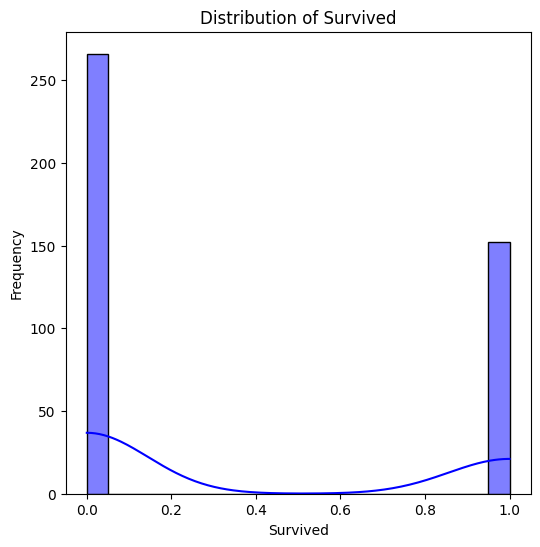

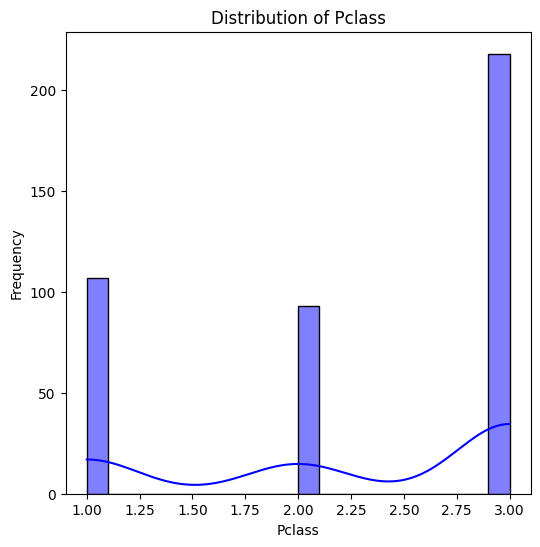

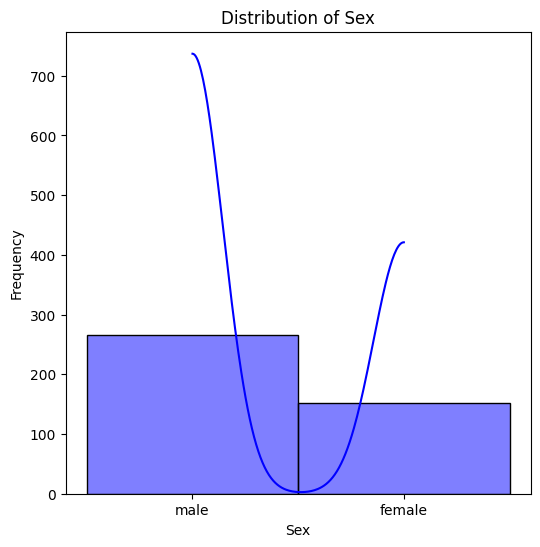

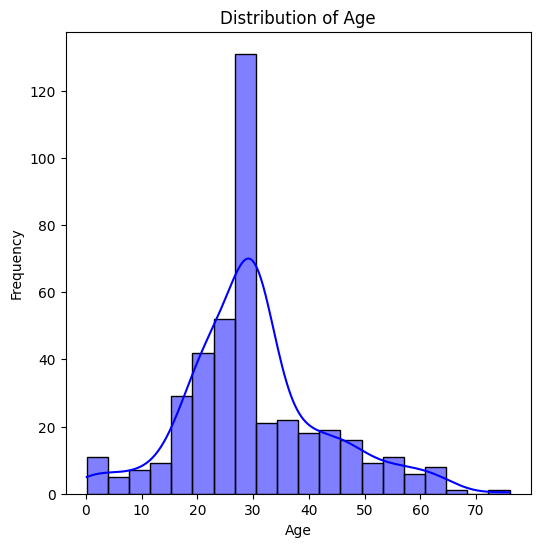

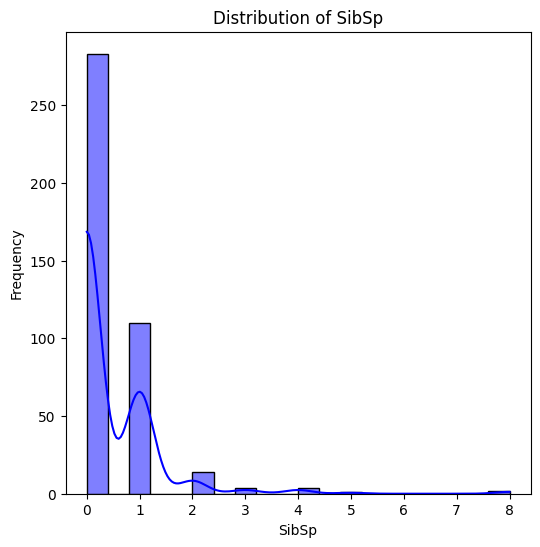

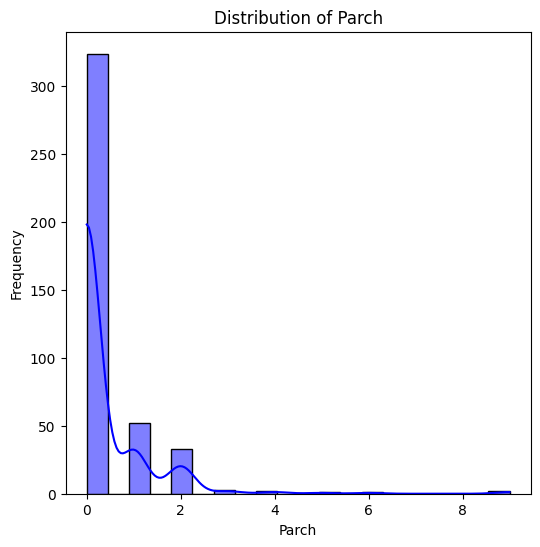

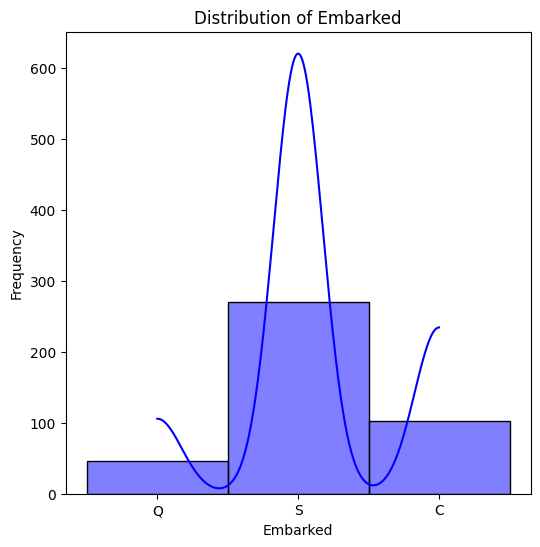

In [14]:
for i in cols:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[i], kde=True, bins=20, color='blue')
    plt.title("Distribution of "+i)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()
    print()

# Encoding categorical data

In [15]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [16]:
X

array([[3, 'male', 34.5, 0, 0, 'Q'],
       [3, 'female', 47.0, 1, 0, 'S'],
       [2, 'male', 62.0, 0, 0, 'Q'],
       ...,
       [3, 'male', 38.5, 0, 0, 'S'],
       [3, 'male', 30.272590361445783, 0, 0, 'S'],
       [3, 'male', 30.272590361445783, 1, 1, 'C']], dtype=object)

In [17]:
X.shape

(418, 6)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1,-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 1.0 0.0 ... 34.5 0 0]
 [1.0 0.0 0.0 ... 47.0 1 0]
 [0.0 1.0 0.0 ... 62.0 0 0]
 ...
 [0.0 1.0 0.0 ... 38.5 0 0]
 [0.0 1.0 0.0 ... 30.272590361445783 0 0]
 [0.0 1.0 1.0 ... 30.272590361445783 1 1]]


## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, -3] = sc.fit_transform(X_train[:, -3].reshape(-1, 1)).ravel()
X_test[:, -3] = sc.transform(X_test[:, -3].reshape(-1, 1)).ravel()

In [21]:
print(X_train)

[[0.0 1.0 1.0 ... 0.669410450384229 0 2]
 [1.0 0.0 1.0 ... 1.7624623810122353 0 0]
 [1.0 0.0 0.0 ... -0.6578668939497788 2 0]
 ...
 [0.0 1.0 0.0 ... -0.5017166181457778 0 0]
 [0.0 1.0 0.0 ... -0.8140171697537797 0 0]
 [1.0 0.0 0.0 ... -0.7359420318517792 0 0]]


In [22]:
precision_list = []
recall_list = []
f1_list = []
support_list = []

## Training the Logistic Regression model on the Training set

In [23]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred = lr_classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
lr_cm = confusion_matrix(y_test, y_pred)
print(lr_cm)
lr_accuracy = accuracy_score(y_test, y_pred)
print(lr_accuracy)
precision, recall, f1_score, suuport  = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Append to respective lists
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)
support_list.append(suuport)

[[58  0]
 [ 0 26]]
1.0


## Training the Decision Tree Classification model on the Training set

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_pred = dt_classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
dt_cm = confusion_matrix(y_test, y_pred)
print(dt_cm)
dt_accuracy= accuracy_score(y_test, y_pred)
print(dt_accuracy)
precision, recall, f1_score, suuport  = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Append to respective lists
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)
support_list.append(suuport)

[[58  0]
 [ 0 26]]
1.0


## Training the K-NN model on the Training set

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn_classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)
knn_accuracy = accuracy_score(y_test, y_pred)
print(knn_accuracy)
precision, recall, f1_score, suuport  = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Append to respective lists
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)
support_list.append(suuport)

[[57  1]
 [ 1 25]]
0.9761904761904762


## Training the Naive Bayes model on the Training set

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [33]:
y_pred = nb_classifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
nb_cm = confusion_matrix(y_test, y_pred)
print(nb_cm)
nb_accuracy = accuracy_score(y_test, y_pred)
print(nb_accuracy)
precision, recall, f1_score, suuport  = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Append to respective lists
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)
support_list.append(suuport)

[[58  0]
 [ 0 26]]
1.0


## Training the Random Forest Classification model on the Training set

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
y_pred = rf_classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
rf_cm = confusion_matrix(y_test, y_pred)
print(rf_cm)
rf_accuracy = accuracy_score(y_test, y_pred)
print(rf_accuracy)
precision, recall, f1_score, suuport  = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Append to respective lists
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)
support_list.append(suuport)

[[58  0]
 [ 0 26]]
1.0


## Training the SVM model on the Training set

In [38]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state=0)
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [39]:
y_pred = svm_classifier.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
svm_cm = confusion_matrix(y_test, y_pred)
print(svm_cm)
svm_accuracy = accuracy_score(y_test, y_pred)
print(svm_accuracy)
precision, recall, f1_score, suuport  = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Append to respective lists
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)
support_list.append(suuport)

[[58  0]
 [ 0 26]]
1.0


## Training the Kernel SVM model on the Training set

In [41]:
from sklearn.svm import SVC
ksvm_classifier = SVC(kernel = 'rbf', random_state=0)
ksvm_classifier.fit(X_train,y_train)

SVC(random_state=0)

In [42]:
y_pred = ksvm_classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
ksvm_cm = confusion_matrix(y_test, y_pred)
print(ksvm_cm)
ksvm_accuracy = accuracy_score(y_test, y_pred)
print(ksvm_accuracy)
precision, recall, f1_score, suuport  = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Append to respective lists
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)
support_list.append(suuport)

[[57  1]
 [ 0 26]]
0.9880952380952381


## Different model comparision

In [44]:
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest', 'SVM', 'Kernel SVM']
accuracies = [lr_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, rf_accuracy, svm_accuracy, ksvm_accuracy]


# Create a DataFrame
df_results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list,
    'Support': support_list
})

# Display the results
print(df_results)

                 Model  Accuracy  Precision    Recall  F1-Score Support
0  Logistic Regression  1.000000   1.000000  1.000000  1.000000    None
1        Decision Tree  1.000000   1.000000  1.000000  1.000000    None
2                  KNN  0.976190   0.972149  0.972149  0.972149    None
3          Naive Bayes  1.000000   1.000000  1.000000  1.000000    None
4        Random Forest  1.000000   1.000000  1.000000  1.000000    None
5                  SVM  1.000000   1.000000  1.000000  1.000000    None
6           Kernel SVM  0.988095   0.981481  0.991379  0.986218    None
